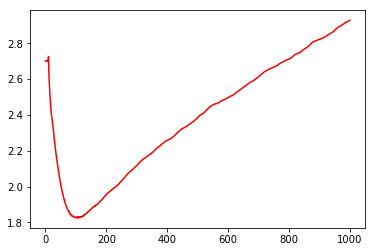

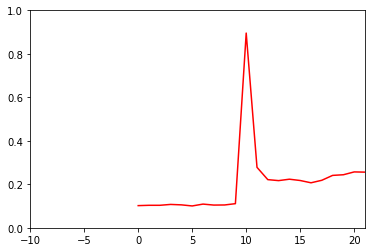

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

mu = 0
sigma =1
group_num = 2000
arm_num = 10
play_num = 1000
average_reward_1 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_1 = np.array([0]* play_num, dtype= 'float')

q_real = np.zeros((group_num,arm_num))
q_get = np.zeros((group_num,arm_num))
q_get += 3
for q_ele in range(group_num):
    q_real[q_ele] = np.random.normal(mu, sigma,arm_num)
    
sum_of_q = 0
j=1
optimal_action = 0
epsilon = 0.1
alpha = 0.1
while j <= play_num:  
    for group_index in range(group_num):
        if (j == 1):
            i = random.randint(0,9)
        else:
            i = np.argmax(q_get[group_index])
        
        if(i == np.argmax(q_real[group_index])):
            optimal_action +=1
        
        q_get[group_index,i] += alpha*(q_real[group_index,i]-q_get[group_index,i])
        sum_of_q += q_get[group_index,i]
        for ele in range(arm_num):
            q_real[group_index,ele] += random.uniform(-0.1,0.1)
        
    average_for_one_time = sum_of_q/group_num
    average_reward_1[j-1] = average_for_one_time
    optimal_action_rate_1[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1

x = range(play_num)

plt.plot(x,average_reward_1,'r')
plt.show()

plt.figure()

plt.plot(x,optimal_action_rate_1,'r')
plt.axis([-10,21,0,1])
plt.show()